In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve

In [48]:
df_data = pd.read_csv('df_final_data.csv')

In [45]:
df_data.head()

,Var6,Var7,Var13,Var21,Var24,Var28,Var35,Var38,Var44,Var57,...,Var211,Var212,Var216,Var217,Var218,Var221,Var226,Var227,Var228,Label
0,1526.0,7.0,184,464,14,166.56,0.0,3570,0.0,4.076907,...,0,44,788,12237,2,4,22,2,8,-1
1,525.0,0.0,0,168,2,353.52,0.0,4764966,0.0,5.408032,...,0,33,1317,5013,0,4,14,2,8,1
2,5236.0,7.0,904,1212,26,220.08,0.0,5883894,0.0,6.599658,...,0,42,1612,8474,1,0,10,0,25,-1
3,98.0,0.0,0,0,0,22.08,0.0,0,0.0,1.988250,...,1,33,1425,9162,1,4,7,2,8,-1
4,1029.0,7.0,3216,64,4,200.00,0.0,0,0.0,4.552446,...,0,44,6,3834,1,4,7,2,8,-1


In [10]:
df_data.tail()

,Var6,Var7,Var13,Var21,Var24,Var28,Var35,Var38,Var44,Var57,...,Var211,Var212,Var216,Var217,Var218,Var221,Var226,Var227,Var228,Label
49995,357.0,0.0,0,132,2,288.08,0.0,6042420,0.0,2.757958,...,0,33,1317,7429,2,4,3,2,8,-1
49996,1078.0,0.0,2736,380,2,166.56,0.0,0,0.0,0.594958,...,1,33,895,1060,1,4,7,2,2,-1
49997,2807.0,7.0,1460,568,4,166.56,0.0,42210,0.0,6.574023,...,0,44,858,3040,1,4,14,2,14,-1
49998,1085.0,7.0,422,154,3,295.28,0.0,6796644,0.0,6.562059,...,1,33,1472,1874,1,4,7,2,8,-1
49999,1694.0,7.0,828,192,0,220.08,5.0,2691228,0.0,1.134800,...,0,33,1548,10439,2,4,22,2,8,-1


0 -> -1 

In [49]:
df_data['Label'] = df_data['Label'].map({-1: 0, 1:1})

In [63]:
df_data.Label.value_counts()

Label
0    46328
1     3672
Name: count, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df_data.drop(['Label'],axis=1),\
                                                                     df_data['Label'], test_size=0.2, random_state=42, stratify=df_data['Label'])

In [52]:
clf = RandomForestClassifier(class_weight='balanced',n_jobs = -1)

In [53]:
classifier.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, 15],
                         'n_estimators': [10, 20, 50, 100, 200, 500]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [54]:
results = pd.DataFrame.from_dict(classifier.cv_results_)

In [55]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.216851,0.058840,0.091640,0.048424,3,10,"{'max_depth': 3, 'n_estimators': 10}",0.658889,0.670298,0.651790,0.660326,0.007624,28,0.675299,0.683915,0.674943,0.678052,0.004148
1,0.344179,0.140391,0.580213,0.056662,3,20,"{'max_depth': 3, 'n_estimators': 20}",0.668543,0.669159,0.663935,0.667212,0.002331,26,0.687679,0.680955,0.684019,0.684218,0.002749
2,0.611847,0.176337,0.660214,0.223907,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.668935,0.676600,0.663066,0.669534,0.005541,24,0.690659,0.689884,0.685661,0.688735,0.002196
3,1.039576,0.224724,1.047402,0.177069,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.657520,0.679195,0.665972,0.667562,0.008920,25,0.682012,0.692787,0.686733,0.687177,0.004410
4,1.828679,0.418217,1.576322,0.075689,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.668194,0.675167,0.669113,0.670825,0.003093,22,0.689569,0.691585,0.687898,0.689684,0.001507


In [56]:
# clf = RandomForestClassifier(n_estimators= 500, n_jobs= -1, verbose=1, class_weight= 'balanced')
clf = classifier.best_estimator_
clf

RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=500,
                       n_jobs=-1)

In [57]:
y_train_pred = clf.predict_proba(X_train)[:,1]
y_test_pred = clf.predict_proba(X_test)[:,1]

In [58]:
rf_train_auc_score = roc_auc_score(y_train, y_train_pred)
rf_test_auc_score = roc_auc_score(y_test, y_test_pred)

In [62]:
rf_train_auc_score, rf_test_auc_score

(0.7802590577436173, 0.6903125369417712)

In [59]:
tr_fpr, tr_tpr, _ = roc_curve(y_train,y_train_pred)
te_fpr, te_tpr, _ = roc_curve(y_test, y_test_pred)

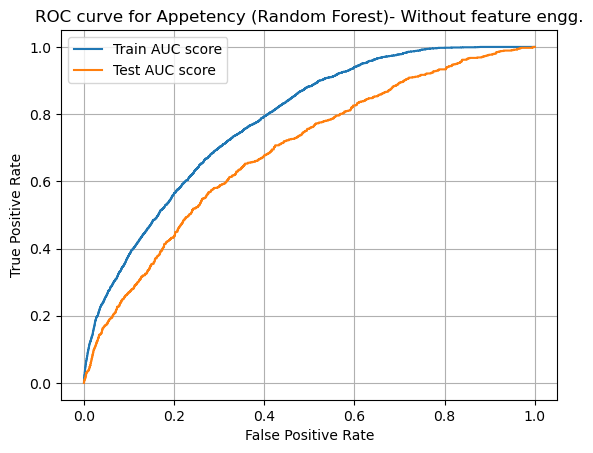

In [60]:
plt.plot(tr_fpr, tr_tpr, label='Train AUC score')
plt.plot(te_fpr, te_tpr, label='Test AUC score')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC curve for Appetency (Random Forest)- Without feature engg.')
plt.grid()
plt.show()

* Our Model is overfitted, there is difference between rf_train_auc_score, rf_test_auc_score
* We can perform hyperparameter tuning to come with overfitting problem